In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import sys
sys.path.append('/content/gdrive/My Drive/Licenta/Scriptsv2')

In [ ]:
import utils
import torch
from cycle_gan2 import CycleGan
from dataset import *
from utils import *
from torch.utils.data import DataLoader
import random
import pickle

In [ ]:
def add_loss(loss_dict, loss):
  for key in loss_dict.keys():
    loss_dict[key].append(loss[key])


In [ ]:
def load_loss(options):
  with open(options.models_root + "losses.pkl", "rb") as f:
    return pickle.load(f)

In [ ]:
def main():
    torch.backends.cudnn.benchmark = True
    options = Options()
    model = CycleGan(options)
    model.setup()
    losses = load_loss(options)

    dataset = MyDataset(options.anime_root, options.real_root, 6000, utils.transform)
    loader = DataLoader(
        dataset,
        batch_size=options.batch_size,
        shuffle=True,
        num_workers=2,
        pin_memory=True
    )

    start = options.starting_epoch
    end = options.num_epochs + options.decay_epochs

    for epoch in range(start, end + 1):
        print(f"Epoch {epoch}: ")
        model.current_epoch = epoch
        model.train(loader)
        print(model.optimizer_g.param_groups[0]["lr"])
        model.update_learning_rate()
        print(model.optimizer_g.param_groups[0]["lr"])
        add_loss(losses, model.loss)

        if options.save_model:
            model.save_checkpoint()
        with open(options.models_root + "losses.pkl", "wb") as f:
          pickle.dump(losses, f)


In [ ]:
seed_everything()
main()

Epoch 1: 


100%|██████████| 1500/1500 [29:39<00:00,  1.19s/it]


0.0002
0.0002
Epoch 2: 


100%|██████████| 1500/1500 [28:48<00:00,  1.15s/it]


0.0002
0.0002
Epoch 3: 


100%|██████████| 1500/1500 [28:53<00:00,  1.16s/it]


0.0002
0.0002
Epoch 4: 


100%|██████████| 1500/1500 [28:50<00:00,  1.15s/it]


0.0002
0.0002
Epoch 5: 


100%|██████████| 1500/1500 [28:50<00:00,  1.15s/it]


0.0002
0.0002
Epoch 6: 


100%|██████████| 1500/1500 [28:47<00:00,  1.15s/it]


0.0002
0.0002
Epoch 7: 


100%|██████████| 1500/1500 [28:54<00:00,  1.16s/it]


0.0002
0.0002
Epoch 8: 


100%|██████████| 1500/1500 [29:02<00:00,  1.16s/it]


0.0002
0.0002
Epoch 9: 


100%|██████████| 1500/1500 [28:50<00:00,  1.15s/it]


0.0002
0.0002
Epoch 10: 


100%|██████████| 1500/1500 [29:01<00:00,  1.16s/it]


0.0002
0.0002
Epoch 11: 


100%|██████████| 1500/1500 [28:59<00:00,  1.16s/it]


0.0002
0.0002
Epoch 12: 


100%|██████████| 1500/1500 [29:01<00:00,  1.16s/it]


0.0002
0.0002
Epoch 13: 


100%|██████████| 1500/1500 [28:52<00:00,  1.16s/it]


0.0002
0.0002
Epoch 14: 


100%|██████████| 1500/1500 [28:53<00:00,  1.16s/it]


0.0002
0.0002
Epoch 15: 


100%|██████████| 1500/1500 [28:50<00:00,  1.15s/it]


0.0002
0.0002
Epoch 16: 


100%|██████████| 1500/1500 [28:49<00:00,  1.15s/it]


0.0002
0.0002
Epoch 17: 


100%|██████████| 1500/1500 [28:50<00:00,  1.15s/it]


0.0002
0.0002
Epoch 18: 


 60%|█████▉    | 895/1500 [18:54<12:46,  1.27s/it]


OutOfMemoryError: ignored

In [ ]:
def plot_loss_graph(losses, name):
  y = [tensor.item() for tensor in losses[name]]
  x = range(len(losses[name]))
  plt.title(name)
  plt.plot(x, y)
  plt.show()

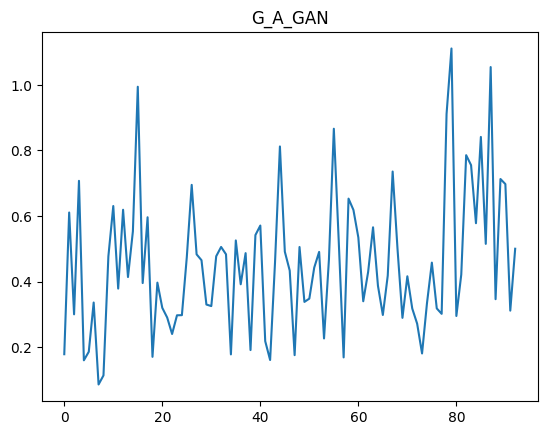

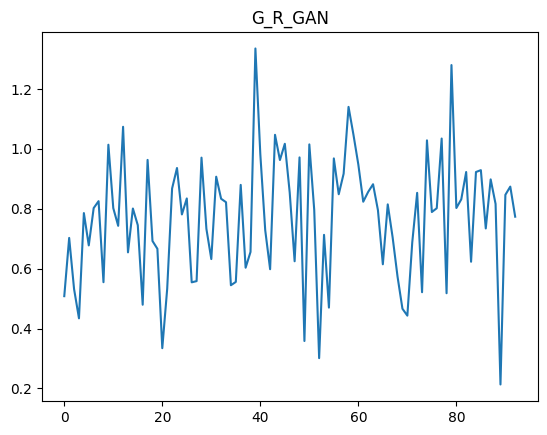

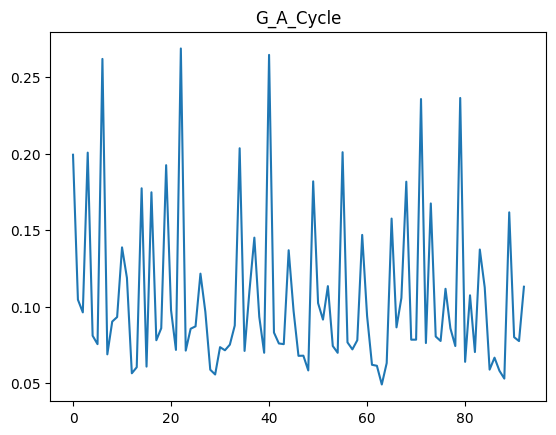

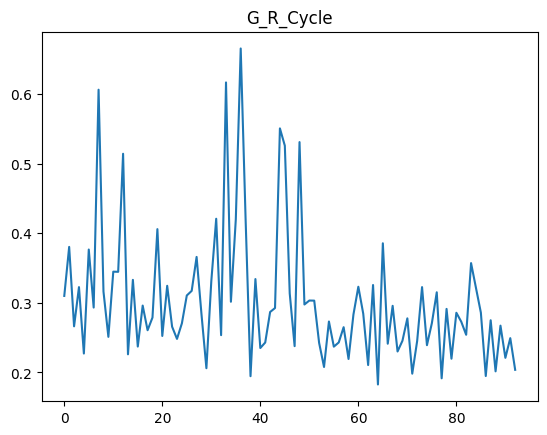

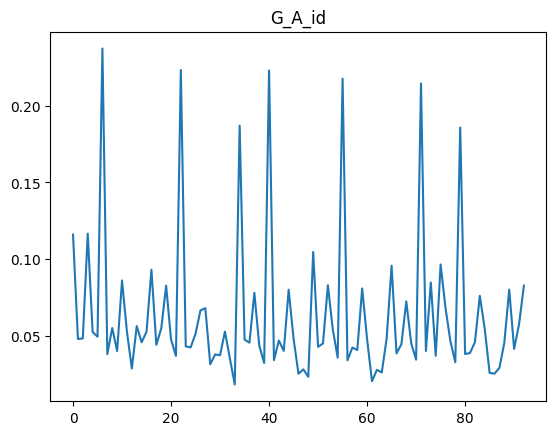

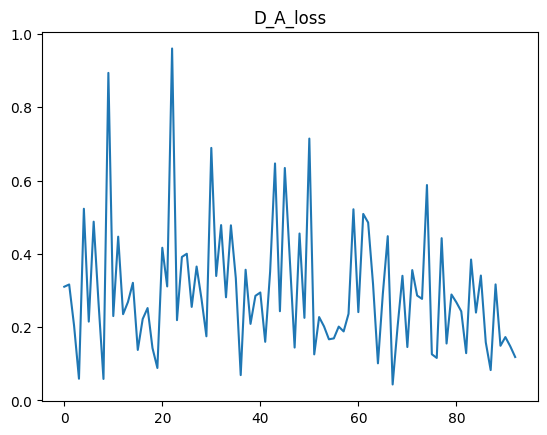

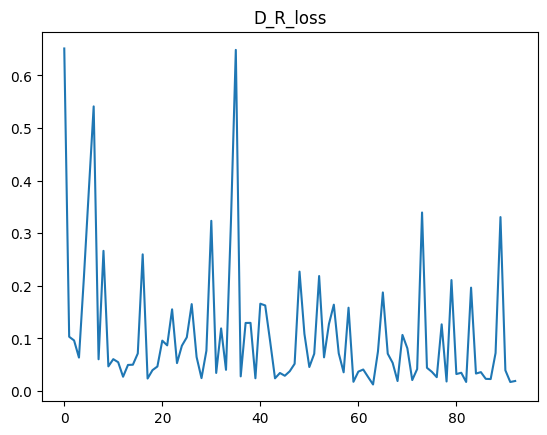

In [ ]:
from matplotlib import pyplot as plt
options = Options()
with open(options.models_root + "losses.pkl", "rb") as f:
  losses = pickle.load(f)
  for key in losses.keys():
    plot_loss_graph(losses, key)

In [ ]:
# options = Options()
# losses = {"G_A_GAN" : [], "G_R_GAN" : [],
#               "G_A_Cycle" : [], "G_R_Cycle" : [],
#               "G_A_id" : [], "G_A_id" : [],
#               "D_A_loss" : [], "D_R_loss" : []}
# with open(options.models_root + "losses.pkl", "wb") as f:
#           pickle.dump(losses, f)

In [ ]:
options = Options()
model = CycleGan(options)
model.current_epoch

40

In [ ]:
from tqdm import tqdm
from torchvision.utils import save_image

torch.backends.cudnn.benchmark = True
options = Options()
model = CycleGan(options)
model.setup()
model.G_A.eval()
model.G_R.eval()

anime = "/content/gdrive/MyDrive/Licenta/Validation/anime"
real = "/content/gdrive/MyDrive/Licenta/Validation/test"
fake_anime = "/content/gdrive/MyDrive/Licenta/Validation/fake_anime"
fake_real = "/content/gdrive/MyDrive/Licenta/Validation/fake_real"
rec_real = "/content/gdrive/MyDrive/Licenta/Validation/rec_real"
rec_anime = "/content/gdrive/MyDrive/Licenta/Validation/rec_anime"

dataset = MyDataset(anime, real, 6, utils.transform)
loader = DataLoader(
        dataset,
        batch_size=options.batch_size,
        shuffle=True,
        num_workers=2,
        pin_memory=True)

options = Options()
loop = tqdm(loader, leave=True)
for idx, image_pair in enumerate(loop):
  model = CycleGan(options)
  model.setup()
  model.G_A.eval()
  model.G_R.eval()
  model.forward(image_pair)
  save_image(model.fake_anime * 0.5 + 0.5, f"{fake_real}/f{idx}.png")
  save_image(model.fake_real * 0.5 + 0.5, f"{fake_anime}/f{idx}.png")
  save_image(model.G_R(model.fake_anime) * 0.5 + 0.5, f"{rec_anime}/f{idx}.png")
  save_image(model.G_A(model.fake_real) * 0.5 + 0.5, f"{rec_real}/f{idx}.png")

100%|██████████| 6/6 [00:06<00:00,  1.15s/it]
